## API CONTROL DIFUSO

In [4]:
#eliminacion de advertencias.
import warnings
warnings.filterwarnings('ignore')

#Importacion de librerias.
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
%matplotlib inline

In [47]:
#se crean los objetos antecedentes y consecuente a partir de las 
#variables del universo y las funciones de membresia.
calidad = ctrl.Antecedent(np.arange(0,11,1),'calidad')
servicio = ctrl.Antecedent(np.arange(0,11,1),'servicio')
propina = ctrl.Consequent(np.arange(0,26,1),'propina')
print(calidad)
print(servicio)
print(propina)

Antecedent: calidad
Antecedent: servicio
Consequent: propina


In [49]:
#La poblacion de la funcion de membresia automatica es posible con .automf(3,5 o 7)
calidad.automf(3)
servicio.automf(3)
#print(calidad.automf(3))
#print(servicio.automf(3))

None
None


In [50]:
#las funciones de membresia personalizadas se pueden construir interactivamente con la api pythonic
propina['bajo'] = fuzz.trimf(propina.universe,[0,0,13])
propina['medio'] = fuzz.trimf(propina.universe,[0,13,25])
propina['alto'] = fuzz.trimf(propina.universe,[13,25,25])

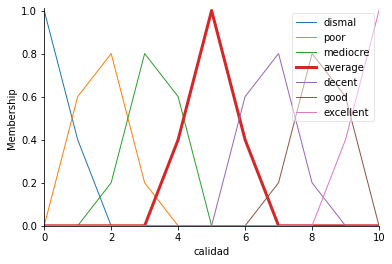

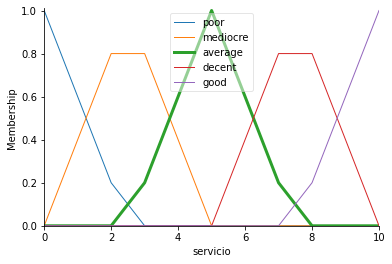

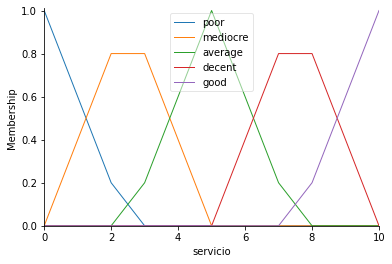

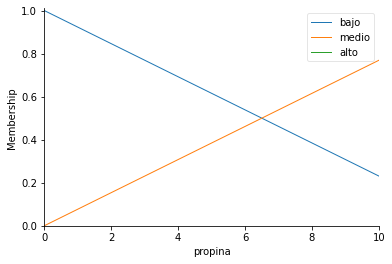

In [24]:
#visualizacion con .view
calidad['average'].view()
servicio['average'].view()
servicio.view()
propina.view()

In [51]:
#creacion de las reglas.
regla1 = ctrl.Rule(calidad['poor'] | servicio['poor'], propina['bajo'])
regla2 = ctrl.Rule(servicio['average'],propina['medio'])
regla3 = ctrl.Rule(servicio['good'] | calidad['good'], propina['alto'])
print(regla1)
print(regla2)
print(regla3)

IF calidad[poor] OR servicio[poor] THEN propina[bajo]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF servicio[average] THEN propina[medio]
	AND aggregation function : fmin
	OR aggregation function  : fmax
IF servicio[good] OR calidad[good] THEN propina[alto]
	AND aggregation function : fmin
	OR aggregation function  : fmax


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1c709320a00>)

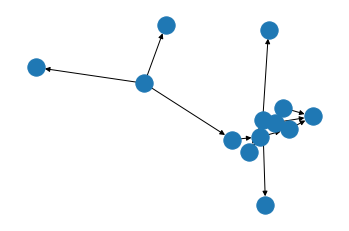

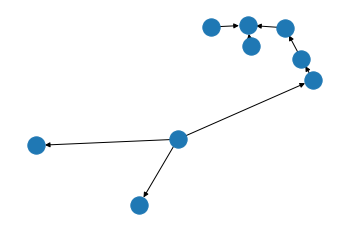

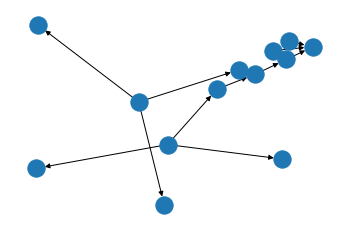

In [52]:
#Visualizacion de las reglas
regla1.view()
regla2.view()
regla3.view()

In [54]:
#Generacion del simulador
control_propina = ctrl.ControlSystem([regla1,regla2,regla3])
asignacion_propina = ctrl.ControlSystemSimulation(control_propina)
#print(control_propina)
#print(asignacion_propina)

el valor de la propina es: 
19.847607361963192


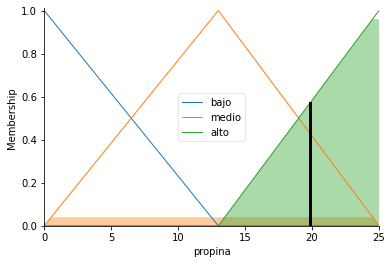

In [55]:
#pasar entradas al ControlSystem usando etiquetas antecedent con pythonic API 
#nota: si quiere pasar muchas entradas a la vez usar .inputs (dict_of_dats)
asignacion_propina.input['calidad'] = 6.5
asignacion_propina.input['servicio'] = 9.8

#obtenemos el valor 
asignacion_propina.compute()
#mostramos la informacion
print("el valor de la propina es: ")
print(asignacion_propina.output['propina'])

#se muestra la curva de asignacion propia
propina.view(sim = asignacion_propina)